In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from itertools import chain

import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
input_dir = "./input/movielens-mllatestsmall"
for dirname, _, filenames in os.walk(input_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
chunk_size = 200000

./input/movielens-mllatestsmall\ml-latest-small\links.csv
./input/movielens-mllatestsmall\ml-latest-small\movies.csv
./input/movielens-mllatestsmall\ml-latest-small\ratings.csv
./input/movielens-mllatestsmall\ml-latest-small\README.txt
./input/movielens-mllatestsmall\ml-latest-small\tags.csv


In [2]:
### READING CSV FILES ###

# movies_dataframe = pd.read_csv(input_dir + "/ml-25m/movies.csv",header=0)
movies_dataframe = pd.read_csv(input_dir + "/ml-latest-small/movies.csv",header=0)
# movies_dataframe["title"] = movies_dataframe["title"].str.split("(").str[0].str.rstrip().str.split(" ")
movies_dataframe["genres"] = movies_dataframe["genres"].str.split("|")
# tags_dataframe = pd.read_csv(input_dir + "/ml-25m/tags.csv",header=0).drop(["timestamp","userId"],axis=1)
# genome_tags_dataframe = pd.read_csv(input_dir + "/ml-25m/genome-tags.csv",header=0)

# huge datasets reading
ratings_dataframe = []
# for chunk in pd.read_csv(input_dir + "/ml-25m/ratings.csv",header=0,chunksize=chunk_size):
for chunk in pd.read_csv(input_dir + "/ml-latest-small/ratings.csv",header=0,chunksize=chunk_size):
#     print(chunk.size)
    chunk = chunk.drop(["timestamp"],axis=1)
    ratings_dataframe.append(chunk)
ratings_dataframe = pd.concat(ratings_dataframe,axis=0)

# genome_scores_dataframe = []
# for chunk in pd.read_csv(input_dir + "/ml-25m/genome-scores.csv",header=0,chunksize=chunk_size):
# #     print(chunk.size)
#     genome_scores_dataframe.append(chunk)
# genome_scores_dataframe = pd.concat(genome_scores_dataframe,axis=0)

print("DONE READING")

DONE READING


In [3]:
print(movies_dataframe.shape)
print(movies_dataframe.head(1))
print("\n\n")
print(ratings_dataframe.shape)
print(ratings_dataframe.head(1))
print("\n\n")

# print(tags_dataframe.shape)
# print(tags_dataframe.head(1))
# print("\n\n")
# print(genome_tags_dataframe.shape)
# print(genome_tags_dataframe.head(1))
# print("\n\n")
# print(genome_scores_dataframe.shape)
# print(genome_scores_dataframe.head(1))
# print("\n\n")

(9742, 3)
   movieId             title  \
0        1  Toy Story (1995)   

                                              genres  
0  [Adventure, Animation, Children, Comedy, Fantasy]  



(100836, 3)
   userId  movieId  rating
0       1        1     4.0





In [4]:
ratings_dataframe = ratings_dataframe.groupby("movieId")
ratings_dataframe = pd.DataFrame({
    "movieId" : ratings_dataframe["movieId"],
    "score" : ratings_dataframe.count()["rating"],
    "rating" : ratings_dataframe.mean()["rating"]
})
ratings_dataframe = ratings_dataframe.drop("movieId",axis=1)
movies_dataframe = pd.merge(ratings_dataframe, movies_dataframe, on='movieId')
del ratings_dataframe

movies_dataframe

,movieId,score,rating,title,genres
0,1,215,3.920930,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,110,3.431818,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,52,3.259615,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,7,2.357143,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,49,3.071429,Father of the Bride Part II (1995),[Comedy]
...,...,...,...,...,...
9719,193581,1,4.000000,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]"
9720,193583,1,3.500000,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]"
9721,193585,1,3.500000,Flint (2017),[Drama]
9722,193587,1,3.500000,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]"


In [5]:
genres_lens = movies_dataframe['genres'].map(len)
movies_dataframe = pd.DataFrame({
    'movieId': np.repeat(movies_dataframe['movieId'], genres_lens),
    'score': np.repeat(movies_dataframe['score'], genres_lens),
    'rating': np.repeat(movies_dataframe['rating'], genres_lens),
    'title': np.repeat(movies_dataframe['title'], genres_lens),
    'genre': chain.from_iterable(movies_dataframe['genres'])
})
movies_dataframe

,movieId,score,rating,title,genre
0,1,215,3.92093,Toy Story (1995),Adventure
0,1,215,3.92093,Toy Story (1995),Animation
0,1,215,3.92093,Toy Story (1995),Children
0,1,215,3.92093,Toy Story (1995),Comedy
0,1,215,3.92093,Toy Story (1995),Fantasy
...,...,...,...,...,...
9720,193583,1,3.50000,No Game No Life: Zero (2017),Fantasy
9721,193585,1,3.50000,Flint (2017),Drama
9722,193587,1,3.50000,Bungo Stray Dogs: Dead Apple (2018),Action
9722,193587,1,3.50000,Bungo Stray Dogs: Dead Apple (2018),Animation


In [6]:
# title_lens = movies_dataframe['title'].map(len)
# movies_dataframe = pd.DataFrame({'movieId': np.repeat(movies_dataframe['movieId'], title_lens),
#               'rating': np.repeat(movies_dataframe['rating'], title_lens),
#               'genre': np.repeat(movies_dataframe['genre'], title_lens),
#               'title': chain.from_iterable(movies_dataframe['title'])
#              })
# movies_dataframe.head(1)

In [7]:

# tags = pd.merge(genome_scores_dataframe, genome_tags_dataframe, on='tagId').drop(["tagId"],axis=1)
# del genome_scores_dataframe,genome_tags_dataframe

# tags_dataframe = pd.merge(tags, tags_dataframe,  how='left', left_on=['movieId','tag'], right_on = ['movieId','tag'])
# del tags

# tags_dataframe

In [8]:
genre_rating_avg = movies_dataframe.groupby("genre")["rating"].mean()
genre_rating_avg = pd.DataFrame({'genre':genre_rating_avg.index, 'genre_rating':genre_rating_avg.values})

movies_dataframe = pd.merge(movies_dataframe,genre_rating_avg,on="genre")

movies_dataframe

,movieId,score,rating,title,genre,genre_rating
0,1,215,3.920930,Toy Story (1995),Adventure,3.215230
1,2,110,3.431818,Jumanji (1995),Adventure,3.215230
2,8,8,2.875000,Tom and Huck (1995),Adventure,3.215230
3,10,132,3.496212,GoldenEye (1995),Adventure,3.215230
4,13,8,3.125000,Balto (1995),Adventure,3.215230
...,...,...,...,...,...,...
22041,174403,1,2.500000,The Putin Interviews (2017),(no genres listed),3.371148
22042,176601,1,5.000000,Black Mirror,(no genres listed),3.371148
22043,181413,1,4.500000,Too Funny to Fail: The Life and Death of The D...,(no genres listed),3.371148
22044,181719,1,3.500000,Serving in Silence: The Margarethe Cammermeyer...,(no genres listed),3.371148


In [9]:
# genres_title = movies_dataframe.drop(["score","rating","genre_rating"],axis=1)
# movies_dataframe = movies_dataframe.drop(["genre","title"],axis=1)

# movies_dataframe

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=100).fit(movies_dataframe.drop(["movieId","genre","title"],axis=1))
centroids = kmeans.cluster_centers_
# print(centroids)
cluster_map = pd.DataFrame()
# cluster_map['data_index'] = movies_dataframe.index.values
cluster_map['category'] = kmeans.labels_
cluster_map

,category
0,11
1,30
2,99
3,39
4,56
...,...
22041,79
22042,83
22043,12
22044,67


In [11]:
movies_dataframe = pd.merge(movies_dataframe,cluster_map,left_index=True,right_index=True)
movies_dataframe

,movieId,score,rating,title,genre,genre_rating,category
0,1,215,3.920930,Toy Story (1995),Adventure,3.215230,11
1,2,110,3.431818,Jumanji (1995),Adventure,3.215230,30
2,8,8,2.875000,Tom and Huck (1995),Adventure,3.215230,99
3,10,132,3.496212,GoldenEye (1995),Adventure,3.215230,39
4,13,8,3.125000,Balto (1995),Adventure,3.215230,56
...,...,...,...,...,...,...,...
22041,174403,1,2.500000,The Putin Interviews (2017),(no genres listed),3.371148,79
22042,176601,1,5.000000,Black Mirror,(no genres listed),3.371148,83
22043,181413,1,4.500000,Too Funny to Fail: The Life and Death of The D...,(no genres listed),3.371148,12
22044,181719,1,3.500000,Serving in Silence: The Margarethe Cammermeyer...,(no genres listed),3.371148,67


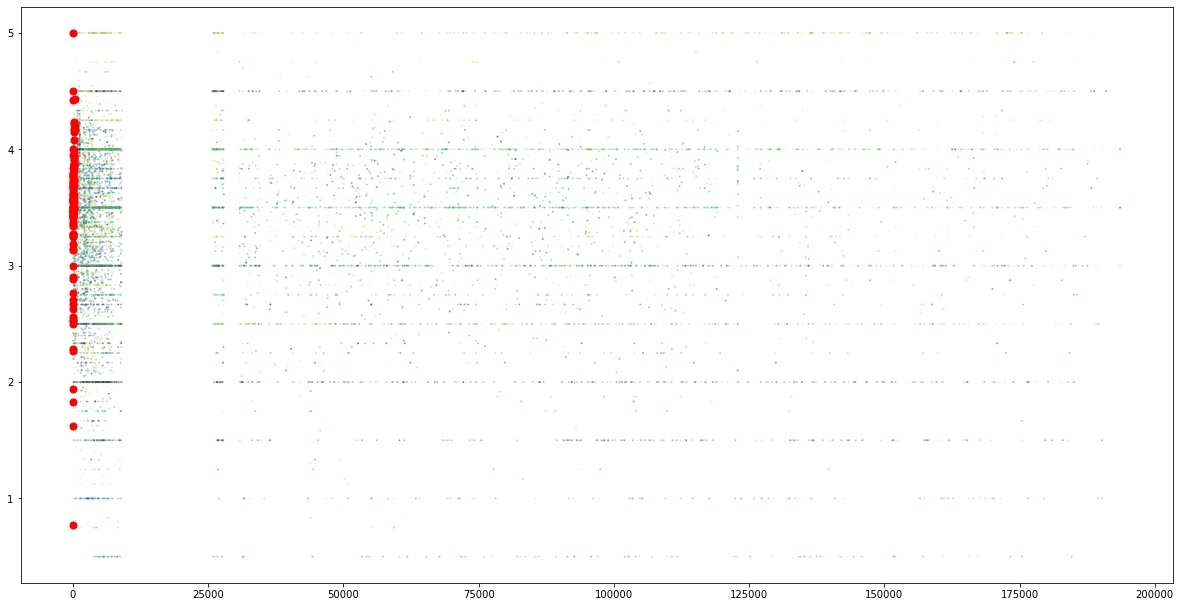

In [29]:
fig = plt.figure(figsize=(20,10))
graph = fig.add_axes([0.1,0.1,0.8,0.8])
graph.scatter(movies_dataframe['movieId'], movies_dataframe['rating'], c= kmeans.labels_.astype(float), s=1, alpha=0.1)
graph.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

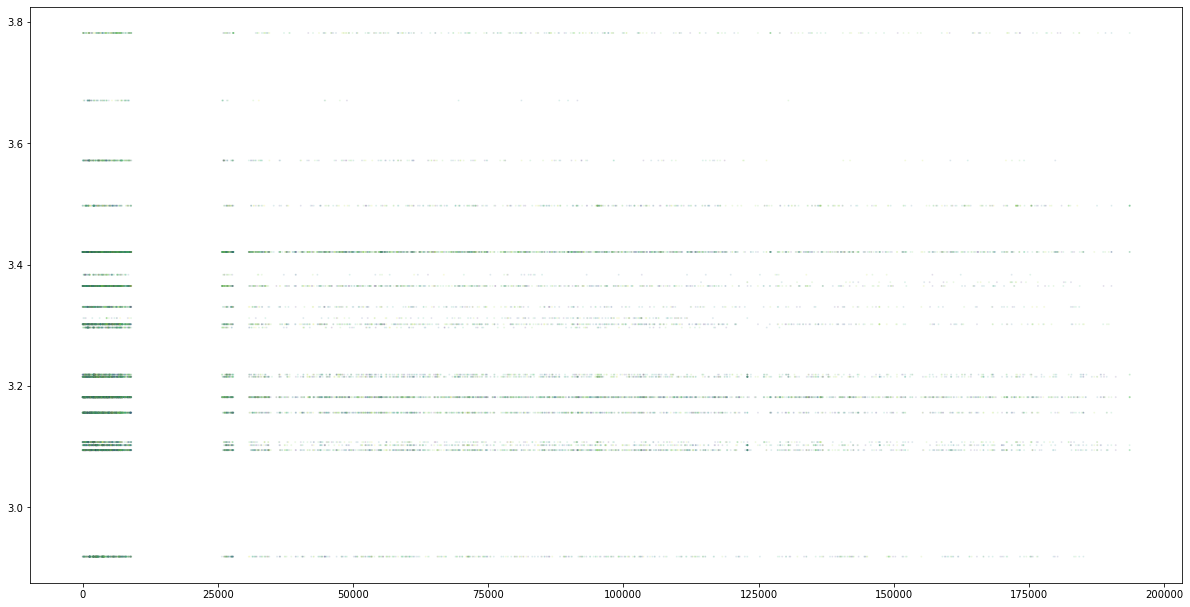

In [13]:
fig = plt.figure(figsize=(20,10))
graph = fig.add_axes([0.1,0.1,0.8,0.8])
graph.scatter(movies_dataframe['movieId'], movies_dataframe['genre_rating'], c= kmeans.labels_.astype(float), s=1, alpha=0.1)
# graph.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

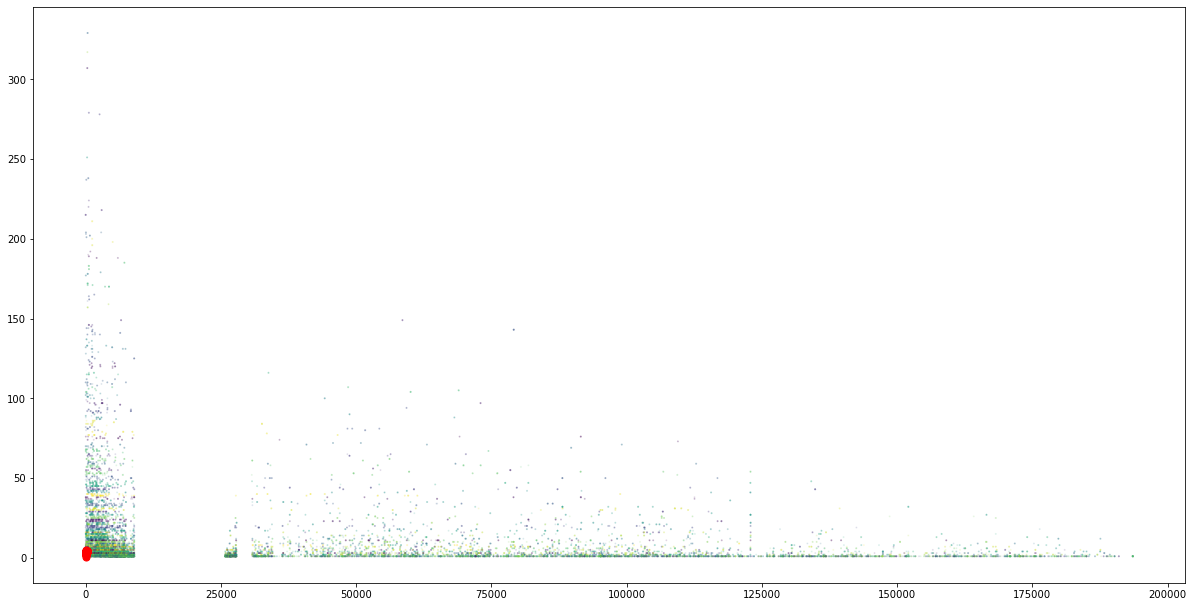

In [14]:
fig = plt.figure(figsize=(20,10))
graph = fig.add_axes([0.1,0.1,0.8,0.8])
graph.scatter(movies_dataframe['movieId'], movies_dataframe['score'], c= kmeans.labels_.astype(float), s=1, alpha=0.1)
graph.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [15]:
movies_dataframe.to_csv("./output/movies.csv", mode='w',index=False, header=True)
# tags_dataframe.to_csv('tags.csv', mode='w',index=False, header=True)
print("DONE WRITING")

DONE WRITING


In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(movies_dataframe.drop(["movieId","title","genre","category"],axis=1), movies_dataframe["category"])

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
test = pd.DataFrame({
    "movieId" : np.array([8644,32031,136800,140174,140627,141818,141994]),
    "title" : np.array(["I, Robot (2004)","Robots (2005)","Robot Overlords (2014)","Room (2015)","Battle For Sevastopol (2015)","Ordinary Miracle (1978)","Saving Christmas (2014)"]),
    "genres" : np.array(["Action|Adventure|Sci-Fi|Thriller","Adventure|Animation|Children|Comedy|Fantasy|Sci-Fi|IMAX","Action|Adventure|Sci-Fi","Drama","Drama|Romance|War","Comedy|Drama|Fantasy|Romance","Children|Comedy"])
})
test

,movieId,title,genres
0,8644,"I, Robot (2004)",Action|Adventure|Sci-Fi|Thriller
1,32031,Robots (2005),Adventure|Animation|Children|Comedy|Fantasy|Sc...
2,136800,Robot Overlords (2014),Action|Adventure|Sci-Fi
3,140174,Room (2015),Drama
4,140627,Battle For Sevastopol (2015),Drama|Romance|War
5,141818,Ordinary Miracle (1978),Comedy|Drama|Fantasy|Romance
6,141994,Saving Christmas (2014),Children|Comedy


In [18]:
test["genres"] = test["genres"].str.split("|")
genres_lens = test['genres'].map(len)
test = pd.DataFrame({
    'movieId': np.repeat(test['movieId'], genres_lens),
    'title': np.repeat(test['title'], genres_lens),
    'genre': chain.from_iterable(test['genres'])
})

test

,movieId,title,genre
0,8644,"I, Robot (2004)",Action
0,8644,"I, Robot (2004)",Adventure
0,8644,"I, Robot (2004)",Sci-Fi
0,8644,"I, Robot (2004)",Thriller
1,32031,Robots (2005),Adventure
1,32031,Robots (2005),Animation
1,32031,Robots (2005),Children
1,32031,Robots (2005),Comedy
1,32031,Robots (2005),Fantasy
1,32031,Robots (2005),Sci-Fi


In [19]:
most_frequent_genre = test.groupby("genre").count()["title"].max()
most_frequent_genre = test.groupby("genre").count().loc[test.groupby("genre").count()["title"] == most_frequent_genre]
most_frequent_genre["title"]

genre
Adventure    3
Comedy       3
Drama        3
Sci-Fi       3
Name: title, dtype: int64

In [21]:
df = movies_dataframe.loc[movies_dataframe['genre'].isin(most_frequent_genre.index)]

genre_rating = df.groupby("genre")["rating"].mean()
genre_rating = pd.DataFrame({
    "genre" : genre_rating.index,
    "genre_rating" :  genre_rating.values
})

df = pd.merge(df.drop("genre_rating",axis=1),genre_rating,on="genre")
df["score"] = df["score"] + 1
df

,movieId,score,rating,title,genre,category,genre_rating
0,1,216,3.920930,Toy Story (1995),Adventure,11,3.215230
1,2,111,3.431818,Jumanji (1995),Adventure,30,3.215230
2,8,9,2.875000,Tom and Huck (1995),Adventure,99,3.215230
3,10,133,3.496212,GoldenEye (1995),Adventure,39,3.215230
4,13,9,3.125000,Balto (1995),Adventure,56,3.215230
...,...,...,...,...,...,...,...
10339,188301,4,3.666667,Ant-Man and the Wasp (2018),Sci-Fi,32,3.102637
10340,189547,2,1.000000,Iron Soldier (2010),Sci-Fi,45,3.102637
10341,190183,2,3.500000,The Darkest Minds (2018),Sci-Fi,67,3.102637
10342,191005,2,4.500000,Gintama (2017),Sci-Fi,12,3.102637


In [22]:
category = model.predict(df.drop(["movieId","title","genre","category"],axis=1))
df["category"] = category

df

,movieId,score,rating,title,genre,category,genre_rating
0,1,216,3.920930,Toy Story (1995),Adventure,11,3.215230
1,2,111,3.431818,Jumanji (1995),Adventure,30,3.215230
2,8,9,2.875000,Tom and Huck (1995),Adventure,36,3.215230
3,10,133,3.496212,GoldenEye (1995),Adventure,46,3.215230
4,13,9,3.125000,Balto (1995),Adventure,36,3.215230
...,...,...,...,...,...,...,...
10339,188301,4,3.666667,Ant-Man and the Wasp (2018),Sci-Fi,65,3.102637
10340,189547,2,1.000000,Iron Soldier (2010),Sci-Fi,62,3.102637
10341,190183,2,3.500000,The Darkest Minds (2018),Sci-Fi,40,3.102637
10342,191005,2,4.500000,Gintama (2017),Sci-Fi,89,3.102637


In [23]:
frequent_category = df.groupby("category").count()["title"]
frequent_category = frequent_category.loc[frequent_category.max() == frequent_category.values].index

df = df.loc[df['category'].isin(frequent_category.values)]
df = df.loc[~df['movieId'].isin(test["movieId"])]

df = df.drop_duplicates(subset=['movieId',"title","score","rating"])

df

,movieId,score,rating,title,genre,category,genre_rating
90,970,2,3.5,Beat the Devil (1953),Adventure,40,3.215230
181,2037,2,4.0,Candleshoe (1977),Adventure,40,3.215230
246,2483,2,3.5,"Day of the Beast, The (Día de la Bestia, El) (...",Adventure,40,3.215230
254,2632,2,4.0,"Saragossa Manuscript, The (Rekopis znaleziony ...",Adventure,40,3.215230
330,3492,2,4.0,"Son of the Sheik, The (1926)",Adventure,40,3.215230
...,...,...,...,...,...,...,...
10321,175197,2,3.5,The Dark Tower (2017),Sci-Fi,40,3.102637
10324,179053,2,3.5,2048: Nowhere to Run (2017),Sci-Fi,40,3.102637
10326,182639,2,4.0,The Second Renaissance Part II (2003),Sci-Fi,40,3.102637
10329,183635,2,3.5,Maze Runner: The Death Cure (2018),Sci-Fi,40,3.102637


In [24]:
top100_watched = df.nlargest(100,["score"])
top10_rated = top100_watched.nlargest(10,["rating"])

top10_rated

,movieId,score,rating,title,genre,category,genre_rating
181,2037,2,4.0,Candleshoe (1977),Adventure,40,3.21523
254,2632,2,4.0,"Saragossa Manuscript, The (Rekopis znaleziony ...",Adventure,40,3.21523
330,3492,2,4.0,"Son of the Sheik, The (1926)",Adventure,40,3.21523
346,3674,2,4.0,For the Love of Benji (1977),Adventure,40,3.21523
390,4323,2,4.0,"Horse Soldiers, The (1959)",Adventure,40,3.21523
396,4445,2,4.0,T-Rex: Back to the Cretaceous (1998),Adventure,40,3.21523
447,5109,2,4.0,Return to Never Land (2002),Adventure,40,3.21523
453,5300,2,4.0,3:10 to Yuma (1957),Adventure,40,3.21523
469,5493,2,4.0,In Like Flint (1967),Adventure,40,3.21523
488,5839,2,4.0,My Father's Glory (La gloire de mon père) (1990),Adventure,40,3.21523


In [25]:
# from lightfm.datasets import fetch_movielens
# from lightfm import LightFM

# #fetch data from model
# data = fetch_movielens(min_rating = 4.0)

# #create model
# model = LightFM(loss = 'warp')

# #train mode
# model.fit(data['train'], epochs=30, num_threads=2)

# #recommender fucntion
# def sample_recommendation(model, data, user_ids):
#     #number of users and movies in training data
#     n_users, n_items = data['train'].shape
#     print(n_items)
#     for user_id in user_ids:
#     	#movies they already like
#         known_positives = data['item_labels'][data['train'].tocsr()[user_id].indices]
#         #movies our model predicts they will like
#         scores = model.predict(user_id, np.arange(n_items))
#         #sort them in order of most liked to least
#         top_items = data['item_labels'][np.argsort(-scores)]
#         #print out the results
#         print("User %s" % user_id)
#         print("     Known positives:")

#         for x in known_positives[:3]:
#             print("        %s" % x)

#         print("     Recommended:")

#         for x in top_items[:3]:
#             print("        %s" % x)
            
# sample_recommendation(model, data, [3, 25, 451])